In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
file='./data/주요국 통화의 대원화환율_25105044.csv'

In [4]:
moneyDF=pd.read_csv(file)

In [5]:
moneyDF

,통계표,계정항목,단위,변환,1998/01/03,1998/01/05,1998/01/06,1998/01/07,1998/01/08,1998/01/09,...,2024/04/12,2024/04/15,2024/04/16,2024/04/17,2024/04/18,2024/04/19,2024/04/22,2024/04/23,2024/04/24,2024/04/25
0,3.1.1.1. 주요국 통화의 대원화환율,원/미국달러(매매기준율),원,원자료,"1,695.80","1,695.80","1,716.30","1,790.00","1,761.00","1,785.30",...,"1,363.70","1,371.60","1,383.70","1,395.30","1,386.30","1,375.90","1,385.00","1,380.60","1,377.90","1,370.00"
1,3.1.1.1. 주요국 통화의 대원화환율,원/일본엔(100엔),원,원자료,"1,280.33","1,282.03","1,287.50","1,333.33","1,330.66","1,356.61",...,890.06,894.80,897.43,901.91,898.36,889.77,895.89,891.89,890.26,882.48
2,3.1.1.1. 주요국 통화의 대원화환율,원/유로,원,원자료,"1,858.17","1,858.17","1,860.13","1,932.13","1,908.22","1,935.09",...,"1,462.98","1,460.14","1,470.60","1,481.88","1,479.46","1,464.10","1,476.48","1,470.96","1,474.84","1,465.56"


In [6]:
moneyDF=moneyDF.drop(['통계표','단위','변환'],axis=1)

In [7]:
moneyDF=moneyDF.set_index('계정항목')

In [8]:
moneyDFT=moneyDF.T

In [9]:
moneyDFT_Number = moneyDFT.apply(lambda x : pd.to_numeric(x.str.replace(',' , '')))

In [10]:
moneyDFT_Number

계정항목,원/미국달러(매매기준율),원/일본엔(100엔),원/유로
1998/01/03,1695.8,1280.33,1858.17
1998/01/05,1695.8,1282.03,1858.17
1998/01/06,1716.3,1287.50,1860.13
1998/01/07,1790.0,1333.33,1932.13
1998/01/08,1761.0,1330.66,1908.22
...,...,...,...
2024/04/19,1375.9,889.77,1464.10
2024/04/22,1385.0,895.89,1476.48
2024/04/23,1380.6,891.89,1470.96
2024/04/24,1377.9,890.26,1474.84


In [11]:
moneyDFT_Number.reset_index(inplace=True)

In [12]:
moneyDFT_Number

계정항목,index,원/미국달러(매매기준율),원/일본엔(100엔),원/유로
0,1998/01/03,1695.8,1280.33,1858.17
1,1998/01/05,1695.8,1282.03,1858.17
2,1998/01/06,1716.3,1287.50,1860.13
3,1998/01/07,1790.0,1333.33,1932.13
4,1998/01/08,1761.0,1330.66,1908.22
...,...,...,...,...
6570,2024/04/19,1375.9,889.77,1464.10
6571,2024/04/22,1385.0,895.89,1476.48
6572,2024/04/23,1380.6,891.89,1470.96
6573,2024/04/24,1377.9,890.26,1474.84


In [13]:
moneyDFT_Number.index 

RangeIndex(start=0, stop=6575, step=1)

In [14]:
moneyDFT_Number['index'] = pd.to_datetime(moneyDFT_Number['index'])

In [15]:
import seaborn as sns

<Axes: xlabel='index', ylabel='원/미국달러(매매기준율)'>

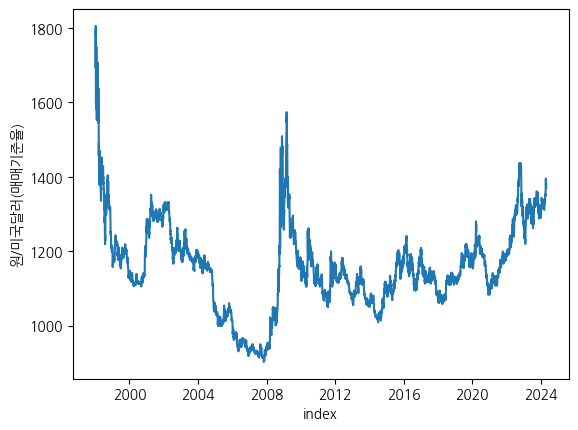

In [16]:
sns.lineplot(moneyDFT_Number, x='index', y='원/미국달러(매매기준율)')

<Axes: xlabel='index', ylabel='원/일본엔(100엔)'>

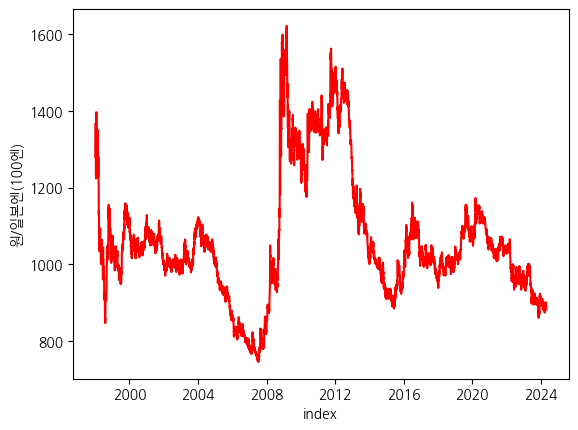

In [17]:
sns.lineplot(moneyDFT_Number, x='index', y='원/일본엔(100엔)',color='red')

<Axes: xlabel='index', ylabel='원/유로'>

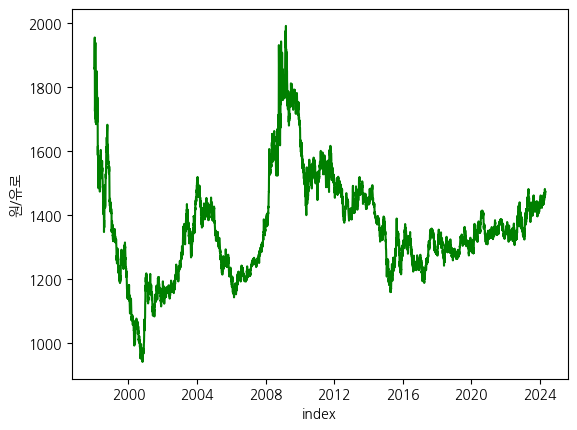

In [18]:
sns.lineplot(moneyDFT_Number, x='index', y='원/유로',color='green')

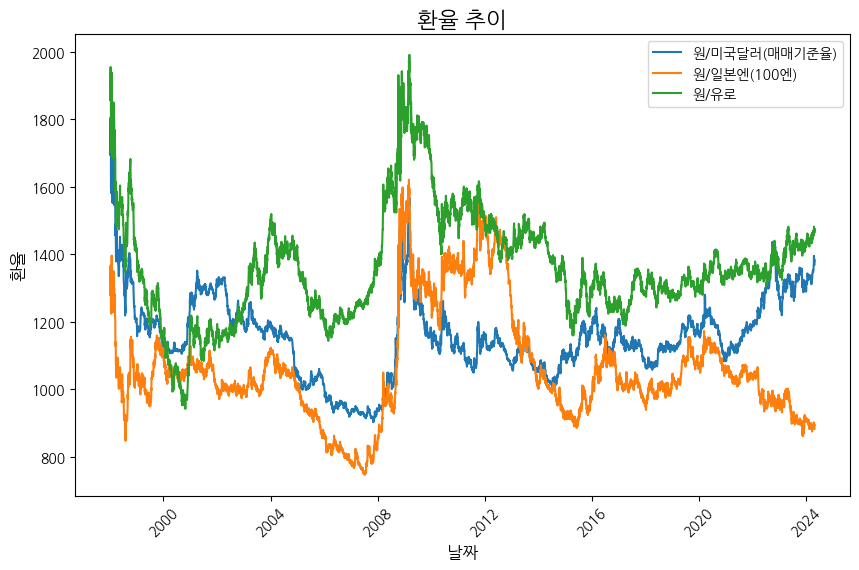

In [19]:
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
for col in moneyDFT_Number.columns[1:]:
    plt.plot(moneyDFT_Number['index'], moneyDFT_Number[col], label=col)
plt.xticks(rotation=45)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('환율', fontsize=12)
plt.title('환율 추이', fontsize=16)
plt.legend()
plt.show()

In [20]:
# !pip install pmdarima

1. ARIMA로 예측한 5개년

원/미국달러(매매기준율) 예측 결과 (MSE): 18073.12


C:\Users\kdp\AppData\Local\Temp\ipykernel_18572\3132162371.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f"{col}_pred"] = predictions


원/일본엔(100엔) 예측 결과 (MSE): 6058.56


C:\Users\kdp\AppData\Local\Temp\ipykernel_18572\3132162371.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f"{col}_pred"] = predictions


원/유로 예측 결과 (MSE): 10152.87


C:\Users\kdp\AppData\Local\Temp\ipykernel_18572\3132162371.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f"{col}_pred"] = predictions


<Axes: xlabel='index'>

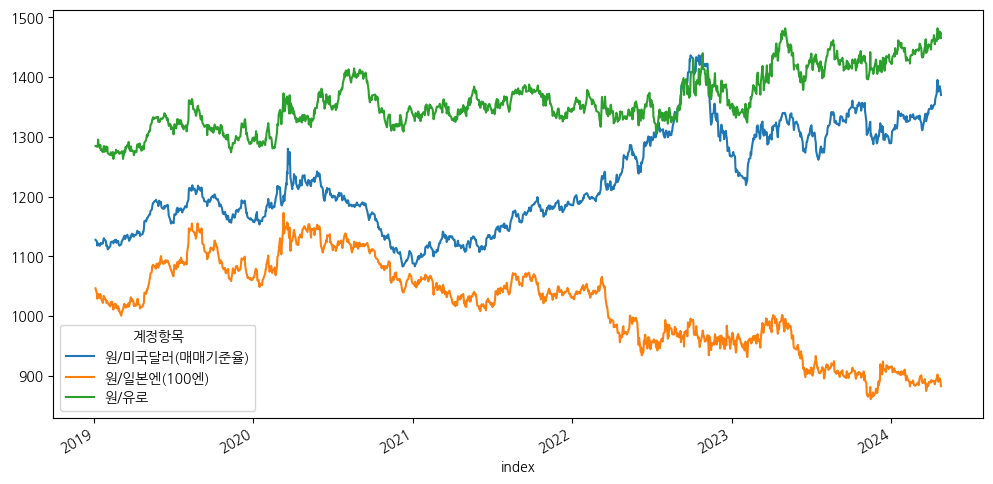

In [21]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error

# 학습 데이터와 테스트 데이터 분리
train_size = int(len(moneyDFT_Number) * 0.8)
train, test = moneyDFT_Number[:train_size], moneyDFT_Number[train_size:]

# ARIMA 모델 학습 및 예측
for col in moneyDFT_Number.columns[1:]:
    model = auto_arima(train[col], seasonal=False, trace=False)
    predictions = model.predict(n_periods=len(test))
    mse = mean_squared_error(test[col], predictions)
    print(f"{col} 예측 결과 (MSE): {mse:.2f}")
    test[f"{col}_pred"] = predictions
    
# 실제 값과 예측 값 시각화
test.set_index('index')[moneyDFT_Number.columns[1:]].plot(figsize=(12, 6))

2.Prophet

In [22]:
# !pip install prophet

In [23]:
# from prophet import Prophet

# # Prophet 모델 학습 및 예측
# for col in moneyDFT_Number.columns[1:]:
#     df = moneyDFT_Number.rename(columns={col: 'y'})[['index', 'y']]
#     df.columns = ['ds', 'y']  # 컬럼명 변경
#     df = df.dropna()
#     model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
#     model.add_country_holidays(country_name='KOR')
#     model.fit(df)
#     future = model.make_future_dataframe(periods=365)
#     forecast = model.predict(future)
    
#     # 예측 결과 출력
#     print(f"{col} 예측 결과:")
#     print(forecast[['ds', 'yhat']].set_index('ds').tail(30))
    
#     # 실제 값과 예측 값 시각화
#     fig = model.plot(forecast)
#     plt.title(col)
#     plt.show()

3.LSTM

In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [248]:


# 데이터 준비
cols = moneyDFT_Number.columns[1:]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(moneyDFT_Number[cols])

# 데이터 분할
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 데이터 전처리
look_back = 30  # 이전 30일 데이터 사용
X_train, y_train = [], []
for i in range(look_back, len(train_data)):
    X_train.append(train_data[i-look_back:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM 모델 구축 및 학습
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, len(cols))))
model.add(Dense(len(cols)))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# 예측
X_test = []
for i in range(look_back, len(scaled_data)):
    X_test.append(scaled_data[i-look_back:i])
X_test = np.array(X_test)
predictions = model.predict(X_test)

# 예측 값 역정규화
predictions = scaler.inverse_transform(predictions)


# 예측 결과 출력
future_dates = pd.date_range(start=moneyDFT_Number['index'].max(), periods=len(predictions), freq='D')  #기간은 전체 기간만큼, 즉 24년,freq=는 날짜의 간격 지정
for col in moneyDFT_Number.columns[1:]: # 첫번째는 날짜 컬럼
    col_name = f"{col}_pred"  # 열 이름 변경
    if col == '원/미국달러(매매기준율)':
        col_name = '원/달러 환율'
    print(f"{col} 예측 결과:")
    result = pd.DataFrame({col_name: predictions[:, moneyDFT_Number.columns.get_loc(col)-1]}, index=future_dates)  
    print(result.to_string())
    print()




Epoch 1/100
164/164 [==============================] - 2s 7ms/step - loss: 0.0047
Epoch 2/100
164/164 [==============================] - 1s 8ms/step - loss: 5.3417e-04
Epoch 3/100
164/164 [==============================] - 1s 8ms/step - loss: 4.9731e-04
Epoch 4/100
164/164 [==============================] - 1s 8ms/step - loss: 4.4560e-04
Epoch 5/100
164/164 [==============================] - 1s 8ms/step - loss: 4.1320e-04
Epoch 6/100
164/164 [==============================] - 1s 9ms/step - loss: 3.7084e-04
Epoch 7/100
164/164 [==============================] - 1s 8ms/step - loss: 3.4988e-04
Epoch 8/100
164/164 [==============================] - 1s 8ms/step - loss: 3.3037e-04
Epoch 9/100
164/164 [==============================] - 1s 9ms/step - loss: 3.2100e-04
Epoch 10/100
164/164 [==============================] - 2s 9ms/step - loss: 3.0347e-04
Epoch 11/100
164/164 [==============================] - 2s 10ms/step - loss: 2.9072e-04
Epoch 12/100
164/164 [==============================] -

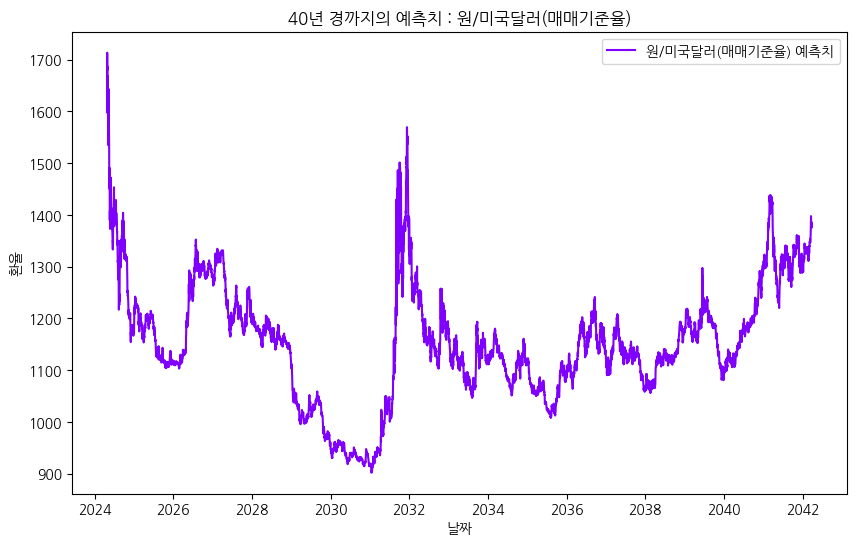

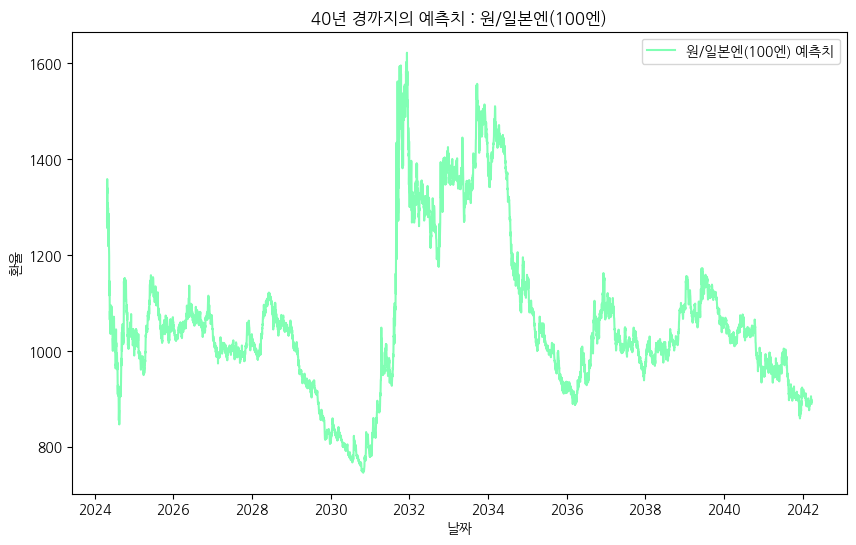

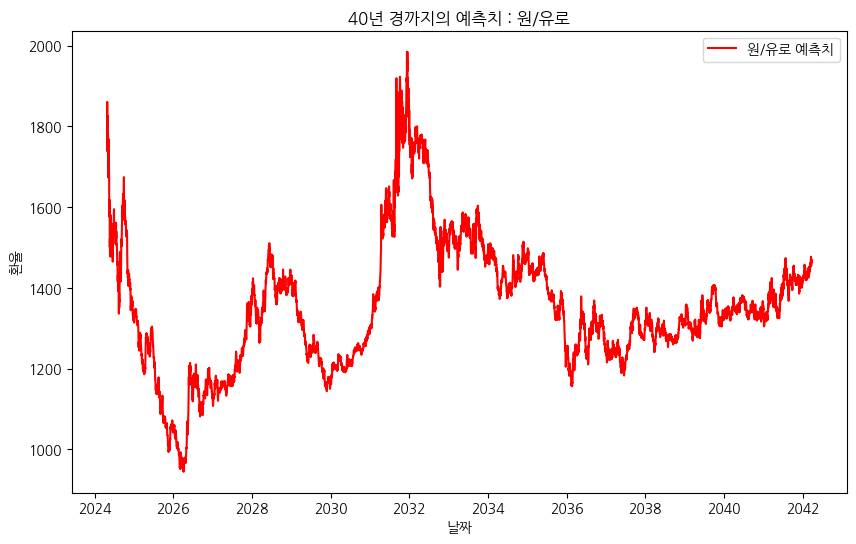

In [249]:
# 피클 임포트
import pickle

# 모델 저장
with open('lstm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# 예측 결과 그래프화
cols = moneyDFT_Number.columns[1:]
test_start_idx = len(moneyDFT_Number) - len(test_data)

for i, col in enumerate(cols):
    col_name = f"{col}_pred"
    plt.figure(figsize=(10, 6))
    
    
    # 예측 데이터 그래프
    plt.plot(future_dates, predictions[:, i], label=f'{col} 예측치', color=colors[i])
    
    plt.title(f'40년 경까지의 예측치 : {col}')
    plt.xlabel('날짜')
    plt.ylabel('환율')
    plt.legend()
    plt.show()

In [233]:
moneyDFT_Number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          6575 non-null   datetime64[ns]
 1   원/미국달러(매매기준율)  6575 non-null   float64       
 2   원/일본엔(100엔)    6575 non-null   float64       
 3   원/유로           6575 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 205.6 KB


In [286]:
import pickle
import numpy as np
from datetime import datetime

# 모델 로드
with open('lstm_model.pkl', 'rb') as f:
    model = pickle.load(f)

# 스케일러 정의
cols = moneyDFT_Number.columns[1:]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(moneyDFT_Number[cols])

def predict_rate(date):
    # 입력 날짜를 datetime 객체로 변환
    input_date = datetime.strptime(date, '%Y-%m-%d')
    
    # 입력 날짜와 마지막 학습 데이터의 날짜 차이 계산
    last_date = moneyDFT_Number['index'].max()
    days_diff = (input_date - last_date).days
    
    # 과거 30일 데이터 준비
    input_data = scaled_data[-30:]
    
    # 예측 날짜만큼 반복하여 예측
    for _ in range(days_diff):
        x = np.array([input_data])
        prediction = model.predict(x)
        input_data = np.concatenate((input_data[1:], prediction.reshape(1, -1)), axis=0)
    
    # 예측 결과 역정규화
    prediction = scaler.inverse_transform(prediction.reshape(1, -1))
    
    # 예측 결과 출력
    print(f'{input_date.date()} 예측 환율:')
    for i, col in enumerate(cols):
        print(f'{col}: {prediction[0, i]:.2f}')

# 함수 사용
predict_rate('2026-10-31')

1/1 [==============================] - 0s 36ms/step
2028-08-01 예측 환율:
원/미국달러(매매기준율): 1090.38
원/일본엔(100엔): 1073.01
원/유로: 984.10


[2]   같은 기간 코스피 지수의 등락

In [202]:
file2='./data/kospi.xls'

In [203]:
kospicolname=['일자','현재지수','대비','등락률(%)','배당수익률(%)','주가이익비율','주가자산비율','시가지수','고가지수','저가지수','거래량(천주)','거래대금(백만원)']

In [204]:
KOSPIDF=pd.read_excel(file2,usecols=[kospicolname[0],kospicolname[1],kospicolname[10],kospicolname[11]])

In [205]:
KOSPIDF.isnull().sum()

일자           0
현재지수         0
거래량(천주)      0
거래대금(백만원)    0
dtype: int64

In [206]:
KOSPIDF

,일자,현재지수,거래량(천주),거래대금(백만원)
0,1998/01/03,385.49,"35,648","247,704"
1,1998/01/05,396.49,"98,417","561,256"
2,1998/01/06,406.34,"74,793","509,534"
3,1998/01/07,409.42,"97,662","685,519"
4,1998/01/08,423.96,"90,007","653,946"
...,...,...,...,...
6538,2024/04/19,"2,591.86","809,473","14,044,807"
6539,2024/04/22,"2,629.44","401,892","11,021,071"
6540,2024/04/23,"2,623.02","430,276","9,948,338"
6541,2024/04/24,"2,675.75","325,740","10,227,695"


In [207]:
KOSPIDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   일자         6543 non-null   object
 1   현재지수       6543 non-null   object
 2   거래량(천주)    6543 non-null   object
 3   거래대금(백만원)  6543 non-null   object
dtypes: object(4)
memory usage: 204.6+ KB


In [208]:
KOSPIDF

,일자,현재지수,거래량(천주),거래대금(백만원)
0,1998/01/03,385.49,"35,648","247,704"
1,1998/01/05,396.49,"98,417","561,256"
2,1998/01/06,406.34,"74,793","509,534"
3,1998/01/07,409.42,"97,662","685,519"
4,1998/01/08,423.96,"90,007","653,946"
...,...,...,...,...
6538,2024/04/19,"2,591.86","809,473","14,044,807"
6539,2024/04/22,"2,629.44","401,892","11,021,071"
6540,2024/04/23,"2,623.02","430,276","9,948,338"
6541,2024/04/24,"2,675.75","325,740","10,227,695"


In [209]:
KOSPIDFD=KOSPIDF.set_index('일자')

In [210]:
KOSPIDFD

,현재지수,거래량(천주),거래대금(백만원)
일자,,,
1998/01/03,385.49,"35,648","247,704"
1998/01/05,396.49,"98,417","561,256"
1998/01/06,406.34,"74,793","509,534"
1998/01/07,409.42,"97,662","685,519"
1998/01/08,423.96,"90,007","653,946"
...,...,...,...
2024/04/19,"2,591.86","809,473","14,044,807"
2024/04/22,"2,629.44","401,892","11,021,071"
2024/04/23,"2,623.02","430,276","9,948,338"


In [211]:
KOSPIDFDS= KOSPIDFD.apply(lambda x : pd.to_numeric(x.str.replace(',' , '')))

코스피 주요값들 형변환

In [214]:
KOSPIDFDS['현재지수'] = pd.to_numeric(KOSPIDFDS['현재지수'])
KOSPIDFDS['거래량(천주)'] = pd.to_numeric(KOSPIDFDS['거래량(천주)'])
KOSPIDFDS['거래대금(백만원)']=pd.to_numeric(KOSPIDFDS['거래대금(백만원)'])
KOSPIDFDS.index=pd.to_datetime(KOSPIDFDS.index)

In [215]:
KOSPIDFDS

,현재지수,거래량(천주),거래대금(백만원)
일자,,,
1998-01-03,385.49,35648,247704
1998-01-05,396.49,98417,561256
1998-01-06,406.34,74793,509534
1998-01-07,409.42,97662,685519
1998-01-08,423.96,90007,653946
...,...,...,...
2024-04-19,2591.86,809473,14044807
2024-04-22,2629.44,401892,11021071
2024-04-23,2623.02,430276,9948338


In [216]:
KOSPIDFDS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6543 entries, 1998-01-03 to 2024-04-25
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   현재지수       6543 non-null   float64
 1   거래량(천주)    6543 non-null   int64  
 2   거래대금(백만원)  6543 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 204.5 KB


In [218]:
KOSPIDFDS.index

DatetimeIndex(['1998-01-03', '1998-01-05', '1998-01-06', '1998-01-07',
               '1998-01-08', '1998-01-09', '1998-01-10', '1998-01-12',
               '1998-01-13', '1998-01-14',
               ...
               '2024-04-12', '2024-04-15', '2024-04-16', '2024-04-17',
               '2024-04-18', '2024-04-19', '2024-04-22', '2024-04-23',
               '2024-04-24', '2024-04-25'],
              dtype='datetime64[ns]', name='일자', length=6543, freq=None)

꺾은선 그래프 그리기

<Axes: xlabel='일자', ylabel='현재지수'>

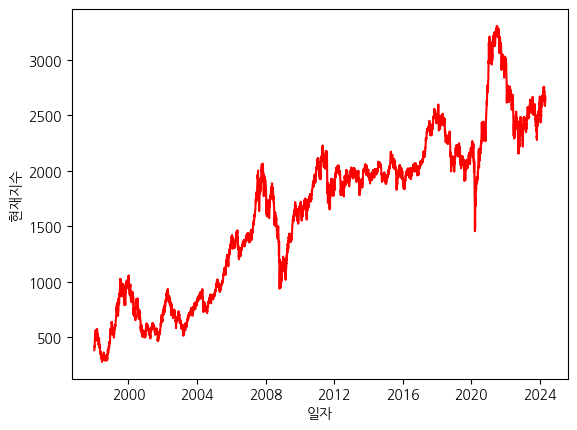

In [222]:
sns.lineplot(KOSPIDFDS, x=KOSPIDFDS.index, y='현재지수',color='red')

<Axes: xlabel='일자', ylabel='거래량(천주)'>

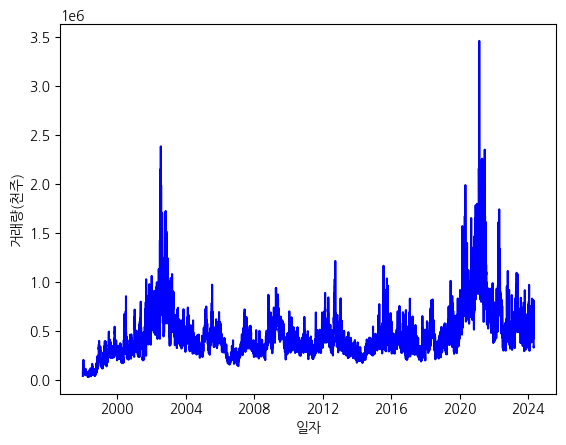

In [223]:
sns.lineplot(KOSPIDFDS, x=KOSPIDFDS.index, y='거래량(천주)',color='blue')

<Axes: xlabel='일자', ylabel='거래대금(백만원)'>

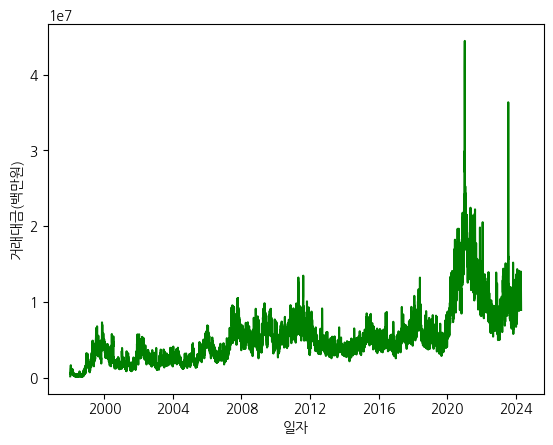

In [224]:
sns.lineplot(KOSPIDFDS, x=KOSPIDFDS.index, y='거래대금(백만원)',color='green')

In [275]:


# 데이터 준비
cols = KOSPIDFDS.columns[:]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(KOSPIDFDS[cols])

# 데이터 분할
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 데이터 전처리
look_back = 30  # 이전 30일 데이터 사용
X_train, y_train = [], []
for i in range(look_back, len(train_data)):
    X_train.append(train_data[i-look_back:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM 모델 구축 및 학습
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, len(cols))))
model.add(Dense(len(cols)))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# 예측
X_test = []
for i in range(look_back, len(scaled_data)):
    X_test.append(scaled_data[i-look_back:i])
X_test = np.array(X_test)
predictions = model.predict(X_test)

# 예측 값 역정규화
predictions = scaler.inverse_transform(predictions)


# # 예측 결과 출력
# future_dates = pd.date_range(start=moneyDFT_Number['index'].max(), periods=len(predictions), freq='D')
# for i, col in enumerate(cols):
#     col_name = f"{col}_pred"  # 열 이름 변경
#     print(f"{col} 예측 결과:")
#     result = pd.DataFrame({col_name: predictions[:, i]}, index=future_dates)
#     print(result.tail(30))

# 예측 결과 출력
future_dates = pd.date_range(start=KOSPIDFDS.index.max(), periods=len(predictions), freq='D')
for col in KOSPIDFDS.columns[:]:
    col_name = f"{col}_pred"  # 열 이름 변경
    print(f"{col} 예측 결과:")
    result = pd.DataFrame({col_name: predictions[:, KOSPIDFDS.columns.get_loc(col)-1]}, index=future_dates)
    print(result.to_string())
    print()




Epoch 1/100
163/163 [==============================] - 3s 9ms/step - loss: 0.0041
Epoch 2/100
163/163 [==============================] - 2s 10ms/step - loss: 5.0622e-04
Epoch 3/100
163/163 [==============================] - 1s 9ms/step - loss: 4.5548e-04
Epoch 4/100
163/163 [==============================] - 2s 11ms/step - loss: 4.3231e-04
Epoch 5/100
163/163 [==============================] - 2s 11ms/step - loss: 4.1918e-04
Epoch 6/100
163/163 [==============================] - 2s 10ms/step - loss: 4.0794e-04
Epoch 7/100
163/163 [==============================] - 2s 11ms/step - loss: 3.9871e-04
Epoch 8/100
163/163 [==============================] - 2s 11ms/step - loss: 3.8810e-04
Epoch 9/100
163/163 [==============================] - 2s 11ms/step - loss: 3.8303e-04
Epoch 10/100
163/163 [==============================] - 2s 11ms/step - loss: 3.7747e-04
Epoch 11/100
163/163 [==============================] - 2s 12ms/step - loss: 3.7081e-04
Epoch 12/100
163/163 [=========================

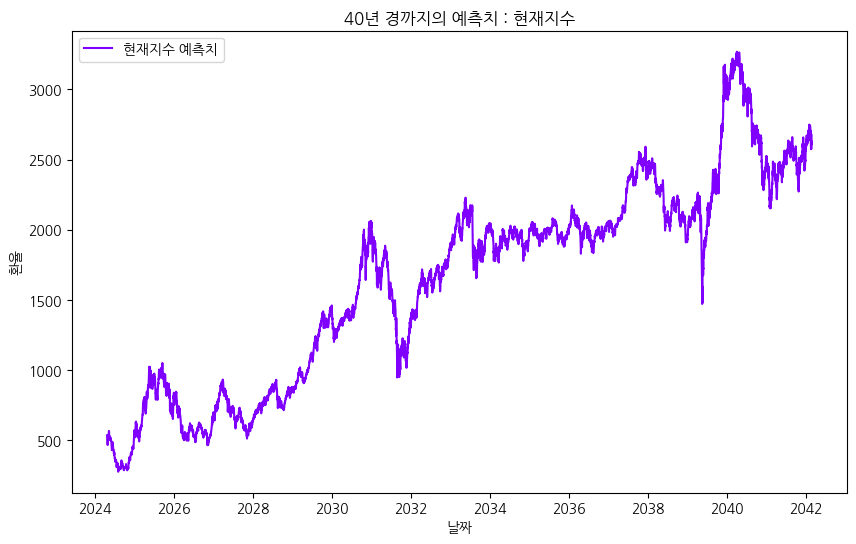

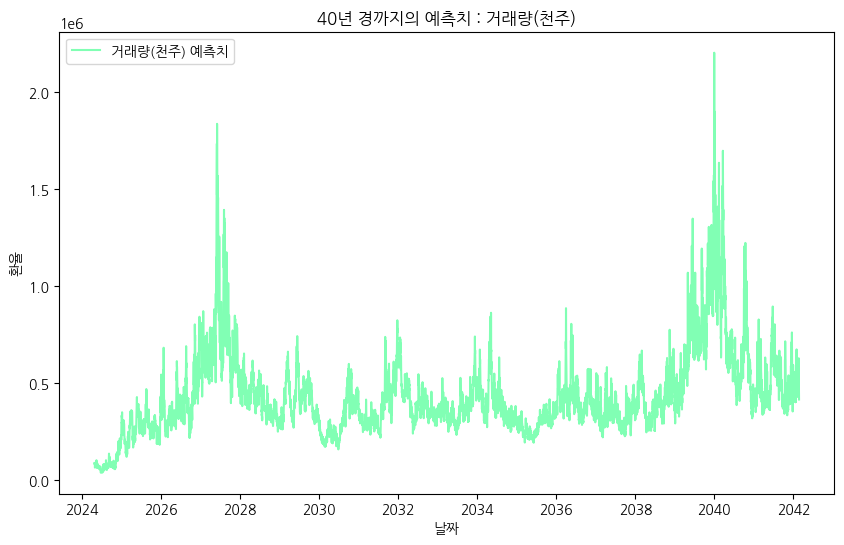

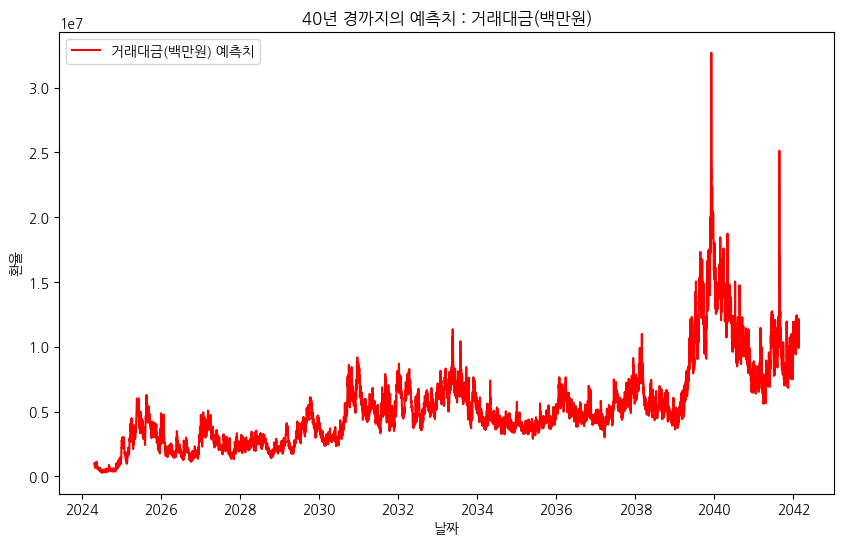

In [277]:
# 예측 결과 그래프화
cols = KOSPIDFDS.columns[:]
test_start_idx = len(KOSPIDFDS) - len(test_data)

for i, col in enumerate(cols):
    col_name = f"{col}_pred"
    plt.figure(figsize=(10, 6))
    
    
    # 예측 데이터 그래프
    plt.plot(future_dates, predictions[:, i], label=f'{col} 예측치', color=colors[i])
    
    plt.title(f'40년 경까지의 예측치 : {col}')
    plt.xlabel('날짜')
    plt.ylabel('환율')
    plt.legend()
    plt.show()